# 平滑化スプライン

\begin{align*}
    {\rm RSS} (f, \lambda) = \sum_{i=1}^N (y_i - f(x_i) )^2 + \lambda \int f^{\prime\prime}(t)^2 dt
\end{align*}

- $\lambda=0$: $f$ はデータを補間する任意の関数。
- $\lambda=\infty$: $f$ は最小二乗解。

\begin{align*}
\cfrac{\partial}{\partial a} \sum_{i=1}^N (y_i - a - bx_i)^2
=& - \sum_{i=1}^N 2(y_i - a - bx_i)
= 2aN - 2\sum_{i=1}^N (y_i - bx_i) \\
\cfrac{\partial}{\partial b} \sum_{i=1}^N (y_i - a - bx_i)^2
=& - \sum_{i=1}^N 2(y_i-a-bx_i)x_i
= 2b \sum_{i=1}^N x_i^2 - 2\sum_{i=1}^N (y_i - a)x_i \\
\therefore\qquad
a =& \cfrac{1}{N} \sum_{i=1}^N (y_i - b x_i)
= \bar{y} - b\bar{x} \\
b{\sum_{i=1}^N x_i^2} =& {\sum_{i=1}^N(y_i - a)x_i}
= {\sum_{i=1}^N \left(y_i - \bar{y} + b\bar{x}\right)x_i}
= {\sum_{i=1}^N x_iy_i - N\bar{x}\bar{y} + Nb\bar{x}^2} \\
\therefore\qquad
b =& \cfrac{N^{-1}\sum_{i=1}^Nx_iy_i - \bar{x}\bar{y}}{N^{-1}\sum_{i=1}^Nx_i^2 - \bar{x}^2}
= \cfrac{{\rm Cov}(x,y)}{\mathbb{V}[x]}
\end{align*}

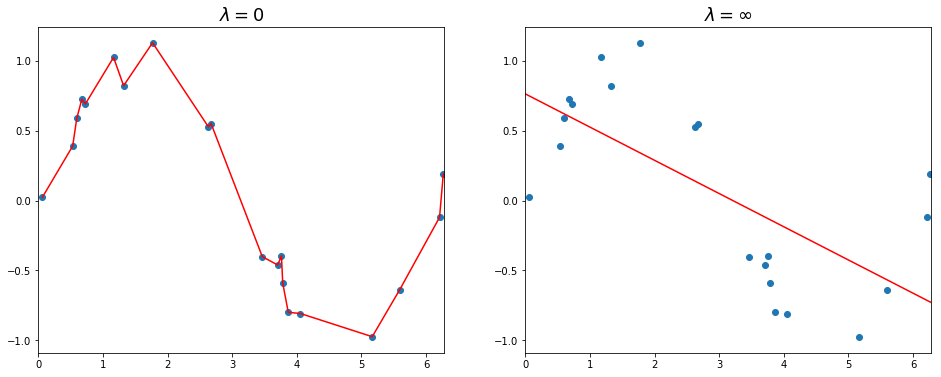

In [2]:
# case of lambda = 0 and lambda = infty 

import numpy as np;
import matplotlib.pyplot as plt;

# data creation
N = 20;
sigma = 0.1;
X = 2*np.pi*np.random.rand (N,1);
Y = np.sin (X) + sigma*np.random.normal (size=(N,1));

# lambda = 0
fig = plt.figure (figsize=(16,6));
ax = fig.add_subplot(121);
ax.scatter (X[:,0],Y[:,0]);
ax.set_xlim ([0, 2*np.pi]);
values = list(zip(X,Y));
data = np.array (values, dtype=[('a',float),('b',float)]);
sorted_data = np.sort (data, order=['a','b']);
sorted_X = [];
sorted_Y = [];
for sd in sorted_data:
    sorted_X.append (sd[0]);
    sorted_Y.append (sd[1]);
ax.plot (sorted_X[:], sorted_Y[:], 'r');
ax.set_title ("$\lambda=0$", fontsize=18)

# lambda = infty
ax = fig.add_subplot(122)
ax.scatter (X[:,0],Y[:,0]);
ax.set_xlim ([0, 2*np.pi]);
b = np.cov(X.T, Y.T)[0,1] / np.var (X);
a = np.mean(Y) - b*np.mean(X);
xs = np.linspace (0,2*np.pi);
ax.plot (xs, a+xs*b, 'r');
ax.set_title ("$\lambda=\infty$", fontsize=18);
